In [27]:
import numpy as np

#
def rescale_columns(arr):
    rows, cols = arr.shape
    rs = np.zeros((rows,cols))
    for col in range(cols):
        rs[:,col] = (1--1)*(arr[:,col]-arr[:,col].min()) / (arr[:,col].max()-arr[:,col].min())-1
    return rs
    
#original
arr = np.random.randn(4, 4)
print(arr)
#rescaled
print(rescale_columns(arr))

#
def standardize_columns(arr):
    rows, cols = arr.shape
    rs = np.zeros(arr.shape)
    for col in range(cols):
        rs[:,col] = (arr[:,col]-arr[:,col].mean()) / arr[:,col].std()
    return rs
        
#standardized
print(standardize_columns(arr))


[[ 1.39617842  0.51707488  1.39960208 -0.45939722]
 [-0.87511228  1.39502934 -0.8232921  -1.17787446]
 [-0.83791144  0.40536005  0.41229314 -0.0448932 ]
 [-0.05619941 -0.8287139  -1.25296422  0.15157798]]
[[ 1.          0.21038145  1.          0.08086189]
 [-1.          1.         -0.67603289 -1.        ]
 [-0.96724256  0.10990687  0.25558208  0.70443294]
 [-0.27890087 -1.         -1.          1.        ]]
[[ 1.61895631  0.18288725  1.40401889 -0.1506831 ]
 [-0.84983827  1.29110506 -0.72534025 -1.56125872]
 [-0.80940257  0.04187268  0.45825398  0.66310645]
 [ 0.04028454 -1.51586499 -1.13693261  1.04883537]]


/home/vphan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Borough
BRONX             391
BROOKLYN         1147
MANHATTAN         683
QUEENS            888
STATEN ISLAND     278
Unspecified         8
dtype: int64
Borough
BRONX             719
BROOKLYN         2344
MANHATTAN        4337
QUEENS           1277
STATEN ISLAND     258
Unspecified         7
dtype: int64


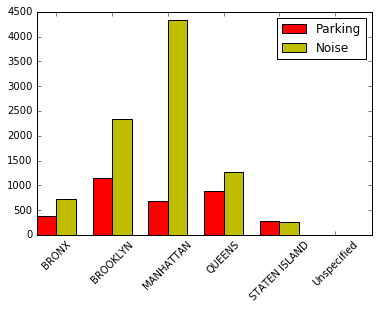

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
#normal charts inside notebooks
%matplotlib inline 
import numpy as np
#print(pd.__version__)

#Load
DF = pd.read_csv("hw1-data/311-service-requests.csv")

#split
df = DF[['Borough','Complaint Type']]
df_noise = df['Complaint Type'].str.contains('Noise')
df_parking = df['Complaint Type'].str.contains('Parking')

#sum
pa = df[df_parking].groupby("Borough").size()
no = df[df_noise].groupby("Borough").size()
print(pa)
print(no)

#plot
ind = np.arange(len(pa))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, pa, width, color='r')
rects2 = ax.bar(ind + width, no, width, color='y')

plt.legend((rects1[0], rects2[0]), ('Parking', 'Noise'))
ax.set_xticks(ind + width)
ax.set_xticklabels(sorted(df[df_noise].groupby("Borough").groups), rotation=45)
plt.show()


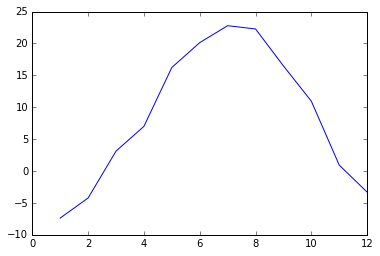

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

#Load
DF = pd.read_csv("hw1-data/weather_2012.csv", parse_dates=['Date/Time'], index_col='Date/Time')

#Average for each month
avg = pd.groupby(DF,by=[DF.index.month])['Temp (C)'].mean()

#plot
plt.plot(avg)
plt.show()

Wind Spd (km/h)    0
dtype: int64
Wind Spd (km/h)    83
dtype: int64
(14.945469034608379, 8.6882014902508917)


/home/vphan/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(5.1467348030372069, 135.52928946793389, -5.2197403896231549, 551.17560684336718)
(0.29389357482947687, -14.144788582098823, 27.863980092269898)


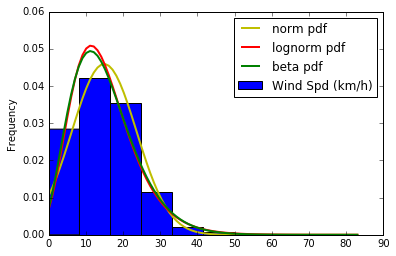

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, beta, lognorm

#Load
DF = pd.read_csv("hw1-data/weather_2012.csv")
wind = DF[['Wind Spd (km/h)']]

xmin = wind.min()
xmax = wind.max()
print(xmin)
print(xmax)

wind.plot(kind='hist', bins=10, normed=True, label='hist')

print(norm.fit(wind))
print(beta.fit(wind))
print(lognorm.fit(wind))

mu, std = norm.fit(wind)
param_log = lognorm.fit(wind)
param_beta = beta.fit(wind)

x = np.linspace(xmin.values, xmax.values, xmax.values)

p = norm.pdf(x, mu, std)
lp = lognorm.pdf(x, param_log[0], loc=param_log[1], scale=param_log[2])
bp = beta.pdf(x, *param_beta[:-2], loc=param_beta[-2], scale=param_beta[-1])
#norm
plt.plot(x, p, 'y', linewidth=2, label='norm pdf')
#lognorm
plt.plot(x, lp, 'r', linewidth=2, label='lognorm pdf')
#beta
plt.plot(x, bp, 'g', linewidth=2, label='beta pdf')

plt.legend()
plt.show()
